# 08 Graphs
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 9 Plotting and Visualization

Outline:
1. Summary of the different plots we can use
2. Overview of MatplotLib
3. Overview of Seaborn
4. Interactive plots
    * Plotly

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset('tips')
#iris = sns.load_dataset('iris')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


-----
## 8.3 Seaborn
When calling a Seaborn command, there are a few mandatory arguments:
* `data`: The dataset to be used in the graph
* `x`: The variable to be graphed
* `y`: Can be used in place of `x` to turn the graph sideways (e.g. horizontal bargraph instead of vertical). If the graph is looking at two variables, then `y` is that second variable

<AxesSubplot: xlabel='day', ylabel='count'>

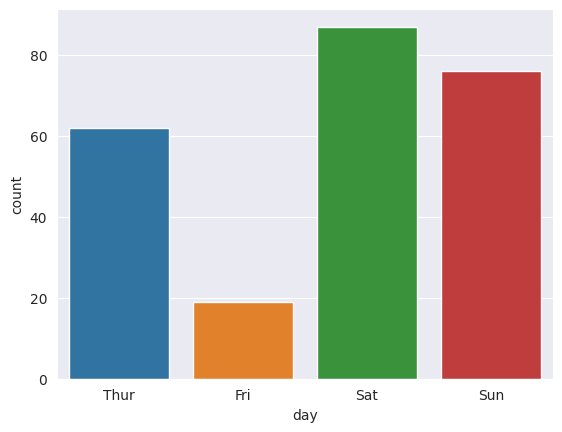

In [47]:
sns.countplot(data=tips, x='day')

But we can add dimensions to this graph by separating the graph by a category. When we use the `hue` command, it will create and color-coordinate multiple graphs for the indicated variable.

To edit the graph's axes (title, axis-labels, etc.), we can just use Matplotlib commands:

Text(0.5, 1.0, 'Number of restaurant visits by gender')

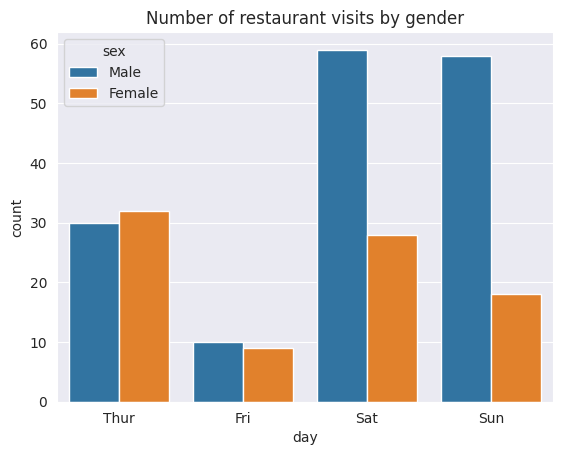

In [48]:
sns.countplot(data=tips, x='day', hue='sex')
plt.title('Number of restaurant visits by gender')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

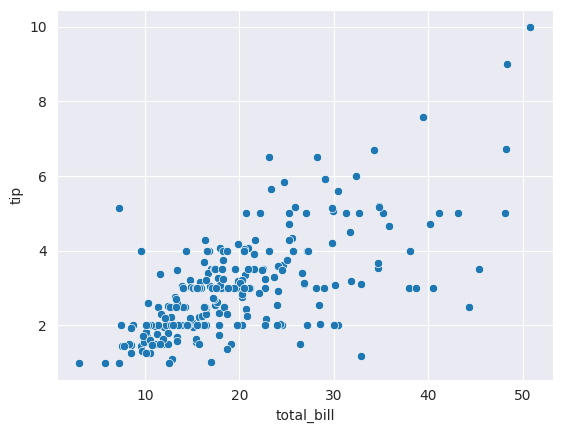

In [49]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

We can change the color of our plot, of course.

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

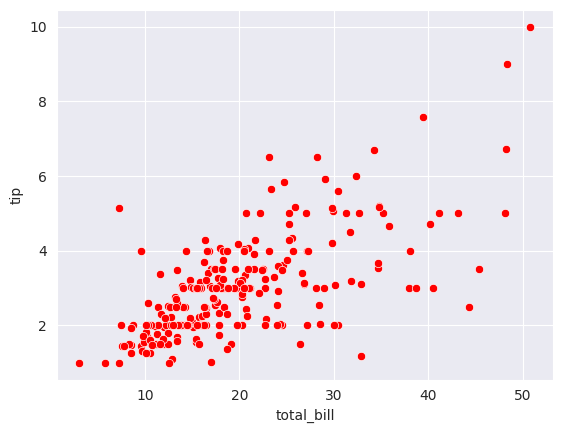

In [50]:
sns.scatterplot(data=tips, x='total_bill', y='tip', color='red')

We can also add an extra dimension to our data by coloring our data based on a category. We do this using the `hue` argument:

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

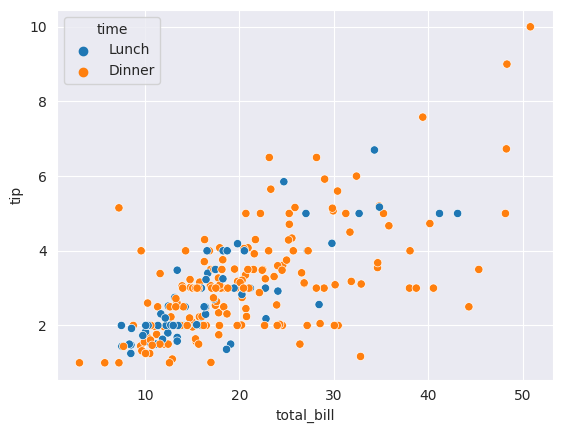

In [51]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

If we don't like the default colors, we can choose difference colors using the `palette` argument, then passing in either a pre-set colorscheme or one of our choosing.

We can also change the theme (background) of the plot. The basic themes to choose from are:
* white
* whitegrid
* dark
* darkgrid
* ticks

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

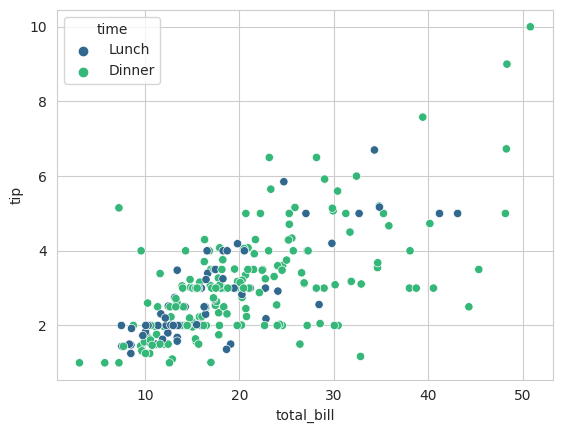

In [52]:
sns.set_style('whitegrid')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', palette='viridis')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

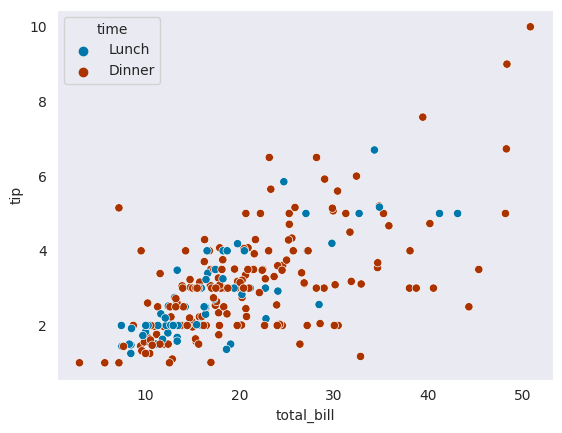

In [53]:
sns.set_style('dark')
pal = {'Lunch' : '#0077aa', 'Dinner' : '#aa3300'}
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', palette=pal)

### A note about colors
When choosing colors, it is tempting to choose colors that we like. I have received many figures in assignments where the colors were wild a crazy. Although I have no problem with that (your colors are your own choice), we have to be careful with the colors we choose. Remember that this figure is for others to see, not yourself. So, let's look at a few principles for choosing colors.
* Choose a color scheme that helps specific categories stand out
* With categorical data, choose a scheme where colors vary
* With quantitative data, choose a scheme with a gradual change
* Choose a color scheme that works for colorblindness

A summary of good color choice practices can be found here:
* https://seaborn.pydata.org/tutorial/color_palettes.html

### Quantitative and Distribution Plots
* Histograms
  * can include KDE plots (will be discussed later)
* Scatter Plots
  * Regression Plots
* Rugplot
  * KDE plots (kernel density estimation)
* 2D KDE plots
* Boxplot, Violinplot, Stripplot, swarmplot
* Heatmap and Clustermap

#### Histograms

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

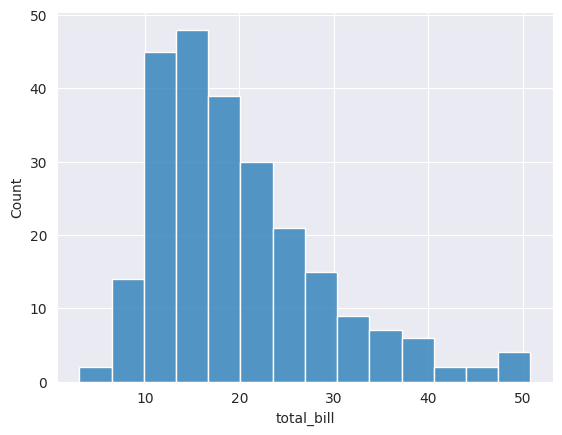

In [54]:
sns.set_style('darkgrid')
sns.histplot(data=tips, x='total_bill')

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

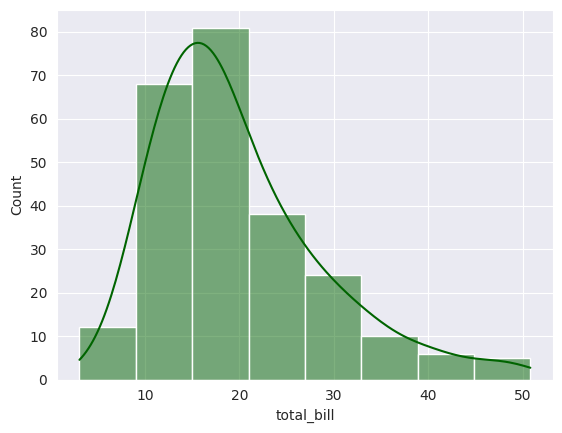

In [55]:
sns.histplot(data=tips, x='total_bill',
             kde=True,
             bins=8,
             color='darkgreen')

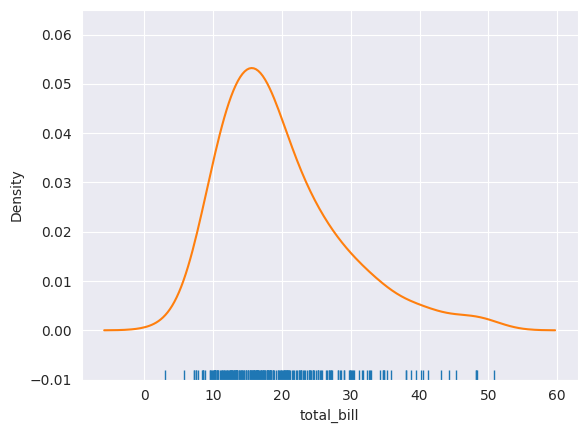

In [56]:
fig, ax = plt.subplots()

sns.rugplot(data=tips, x='total_bill')
sns.kdeplot(data=tips, x='total_bill')

plt.ylim((-0.01,0.065))
plt.show()

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

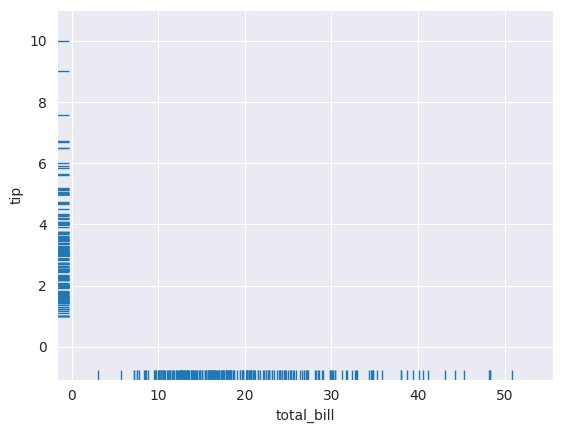

In [57]:
sns.rugplot(data=tips, x='total_bill', y='tip')

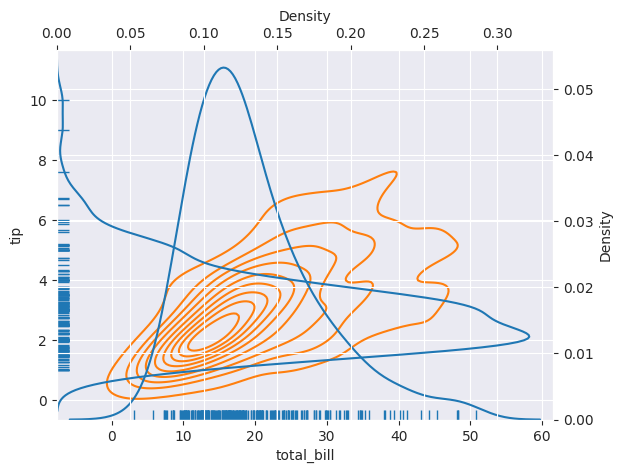

In [58]:
fig, ax = plt.subplots()

sns.rugplot(data=tips, x='total_bill', y='tip', ax=ax)

ax2 = ax.twinx()
sns.kdeplot(data=tips, x='total_bill', ax=ax2)

ax3 = ax.twiny()
sns.kdeplot(data=tips, y='tip', ax=ax3)

# 2D KDE plot
sns.kdeplot(data=tips, x='total_bill', y='tip', ax=ax)

plt.show()


Other quantitative plots include the boxplot. But in seaborn, there are multiple variations of the boxplot:
* Boxplot
* Violinplot
* Swarmplot
* Stripplot

Text(0.5, 1.0, 'Boxplot of tip values based on smoker status')

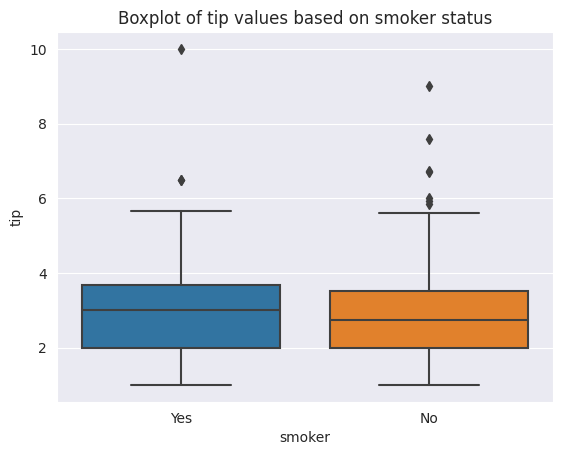

In [76]:
# Boxplot
sns.boxplot(data=tips, x='smoker', y='tip')
plt.title('Boxplot of tip values based on smoker status')

Text(0.5, 1.0, 'Violinplot of tip values based on smoker status')

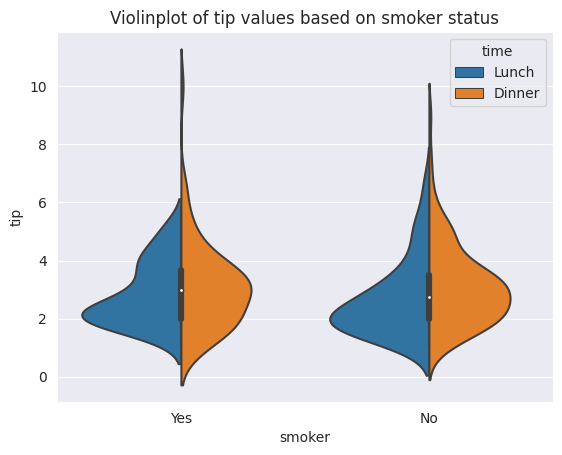

In [82]:
###   Violinplot   ###

sns.violinplot(data=tips, x='smoker', y='tip', hue='time', split=True)
plt.title('Violinplot of tip values based on smoker status')

Text(0.5, 1.0, 'Swarmplot of tip values based on smoker status')

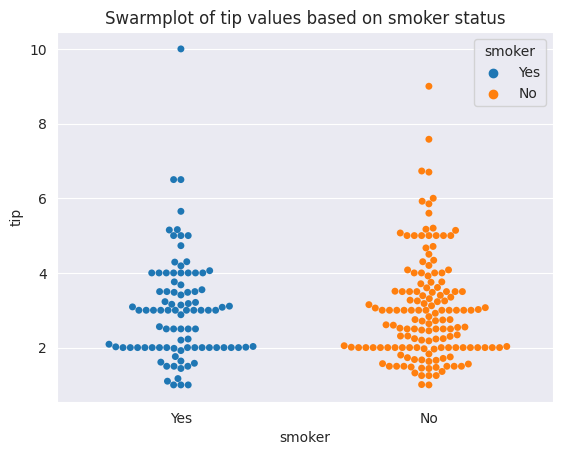

In [83]:
###   Swarmplot   ###

sns.swarmplot(data=tips, x='smoker', y='tip', hue='smoker')
plt.title('Swarmplot of tip values based on smoker status')

Text(0.5, 1.0, 'Stripplot of tip values based on smoker status')

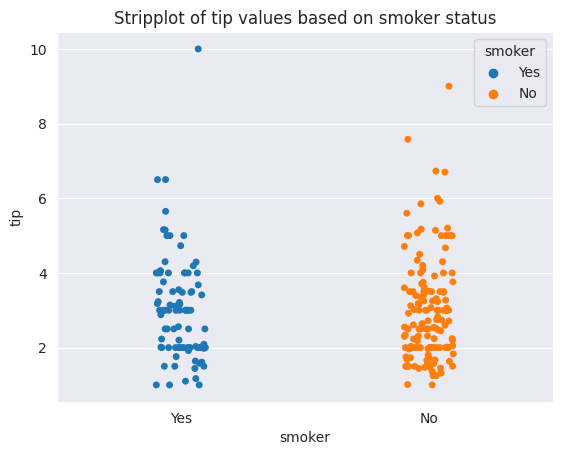

In [89]:
###   Stripplot   ###

sns.stripplot(data=tips, x='smoker', y='tip', hue='smoker', jitter=True)
plt.title('Stripplot of tip values based on smoker status')

We can combine multiple plots into one:

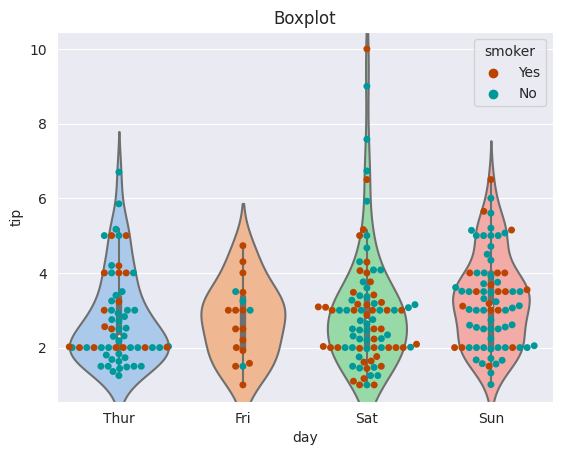

In [86]:
colors = {'Yes': '#bb4400', 'No':'#009999'}

fig, ax = plt.subplots()

sns.violinplot(data=tips, x='day', y='tip', palette='pastel')
sns.swarmplot(data=tips, x='day', y='tip', hue='smoker', palette=colors)

ax.set_title('Boxplot')

plt.show()

### Categorical Plots
* Barplot - displays some value (normally the mean) of some variable by category
* Countplot - displys the number of types some category occurs

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

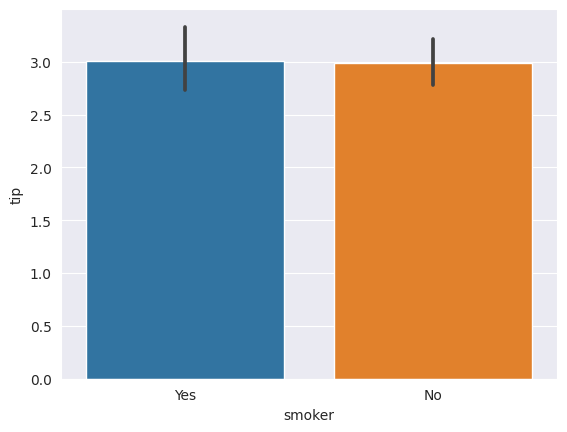

In [59]:
sns.barplot(data=tips, x='smoker', y='tip')

tips.groupby('smoker')['tip'].mean()

<AxesSubplot: xlabel='smoker', ylabel='count'>

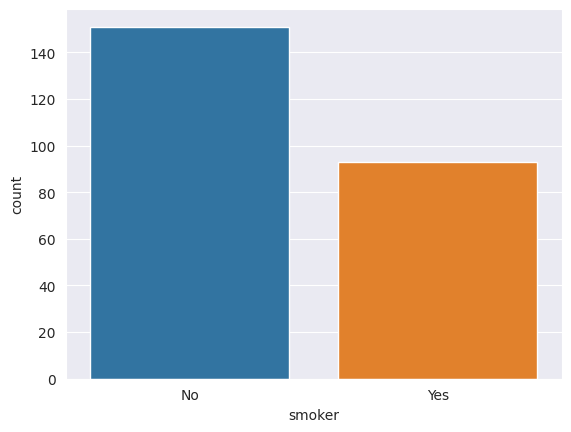

In [60]:
sns.countplot(data=tips, x='smoker', order=['No','Yes'])

### Error Bars in Graphs
Many graphs that give a numerical value (such as barplots and lineplots) allow the user to add an error bar. There are 4 basic error bar types:
* “ci” : Confidence Interval (default)
  * Can set to a specific confidence interval using `errorbar=('ci',85)` (default, ci=95)
* “pi” : Percentile Interval 
  * Central 95% of the data - 95% is default
  * Change with `errorbar=('pi',50)`
* “se” : Standard Error {Standard deviation / sqrt(sample size)}
* “sd” : Standard Deviation
  * Default is 1 standard deviation
  * To change, use `errorbar=('sd',n)` where $n$ is the number of desired standard deviations
* None : Removes the errorbar

There are also ways to create your own error bars.

A more detailed description of error bars can be found here:
* https://seaborn.pydata.org/tutorial/error_bars.html

<AxesSubplot: xlabel='smoker', ylabel='tip'>

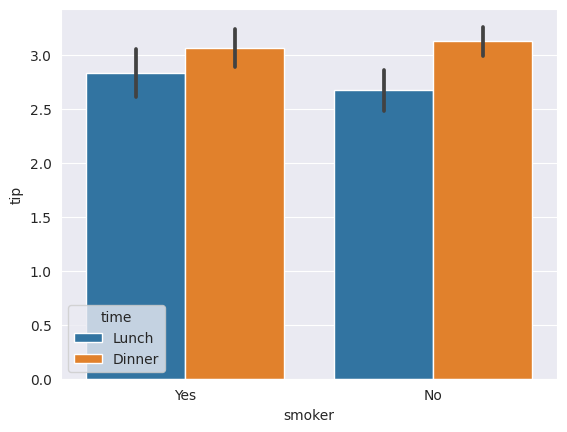

In [61]:
sns.barplot(data=tips, x='smoker', y='tip', hue='time', errorbar='se')

<AxesSubplot: xlabel='smoker', ylabel='tip'>

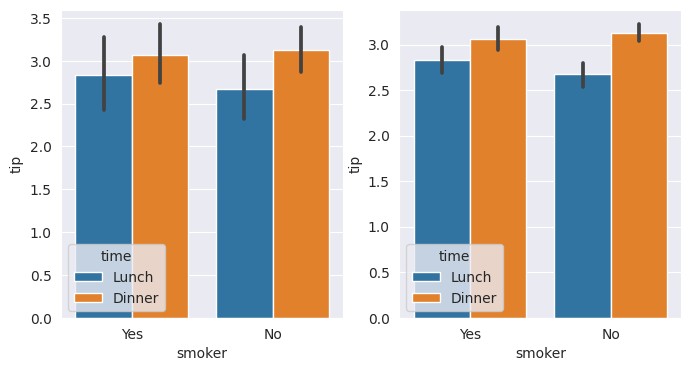

In [62]:
# Use Matplotlib subplots to show two errorbars side-by-side
fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.barplot(data=tips, x='smoker', y='tip', hue='time', errorbar='ci', ax=ax[0])
sns.barplot(data=tips, x='smoker', y='tip', hue='time', errorbar=('ci',50), ax=ax[1])

### 2D Plots

In [63]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot: >

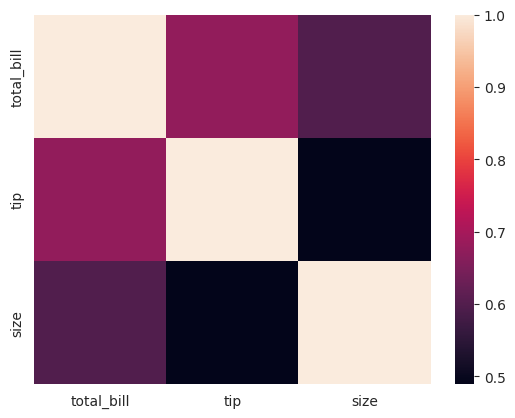

In [65]:
sns.heatmap(tips.corr())

<AxesSubplot: >

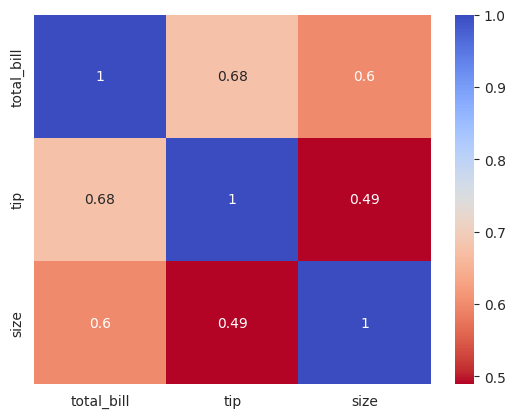

In [66]:
sns.heatmap(tips.corr(), annot=True, cmap='coolwarm_r')

In [67]:
flights = sns.load_dataset('flights')
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


<AxesSubplot: xlabel='year', ylabel='month'>

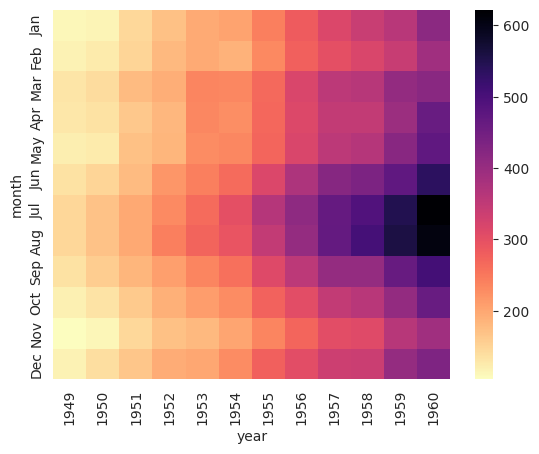

In [68]:
#flights.pivot_table(values='passengers',index='month',columns='year')
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights, cmap='magma_r')

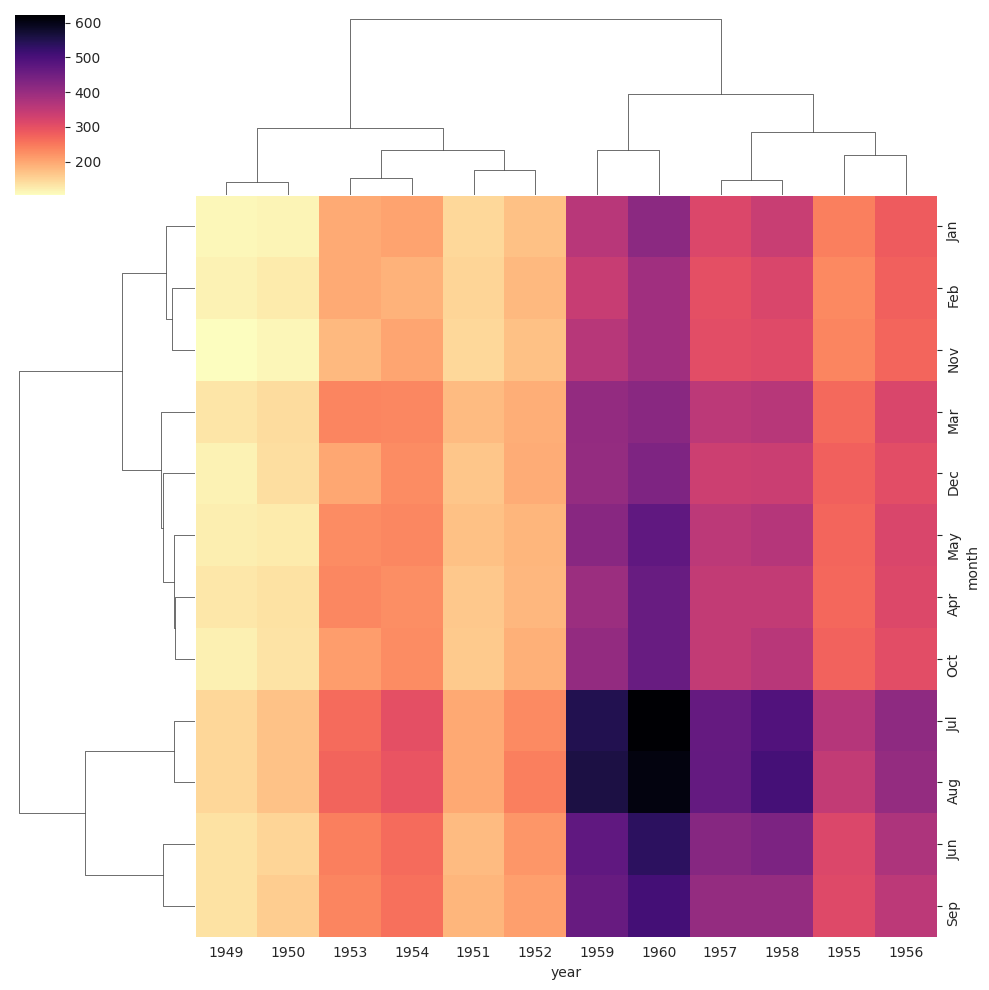

In [69]:
# Clustermaps
sns.clustermap(pvflights, cmap='magma_r')

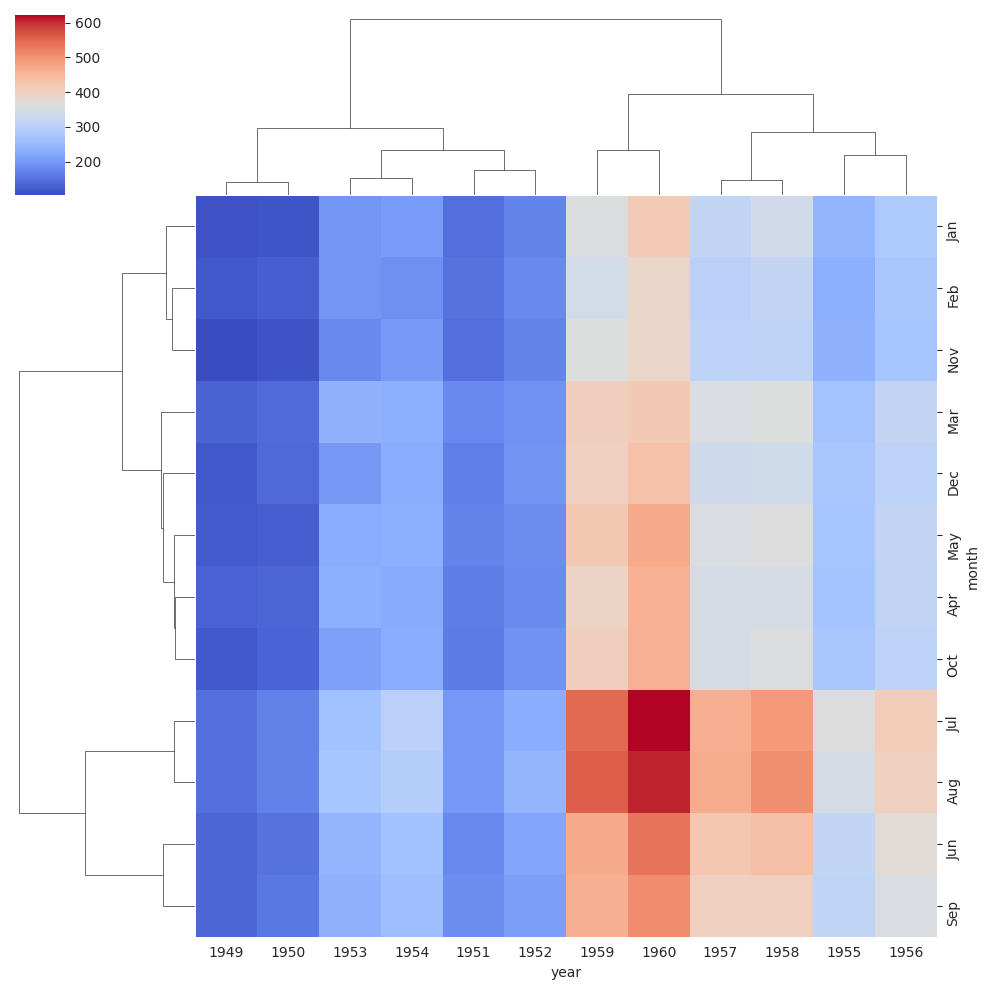

In [70]:
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=None)

### Multiple Plots
We have already seen how to create multiple plots using Matplotlib:
* Using Matplotlib: `fig, ax = plt.subplots(2,3)` and add `ax=ax[1,2]` to the seaborn command

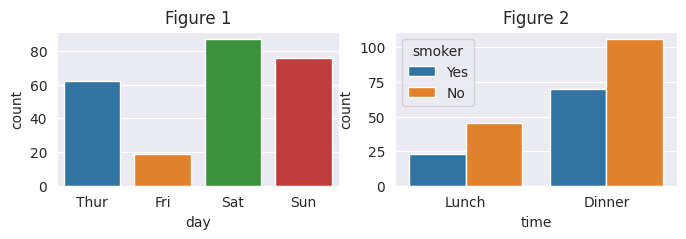

In [90]:
fig, ax = plt.subplots(1,2, figsize=(8,2))

ax[0].set_title('Figure 1')
sns.countplot(data=tips, x='day', ax=ax[0])

ax[1].set_title('Figure 2')
sns.countplot(data=tips, x='time', hue='smoker', ax=ax[1])

plt.show()

There are ways we can create multiple graphs in Seaborn as well.
* FacetGrid
  * Repeat the graph, one column/row for each value of a categorical variable
* PairPlot / PairGrid
  * Compare all quantitative variables simultaneously
* Jointplot / JointGrid
  * Compare two variables, but also see information about the variables individually

#### FacetGrid

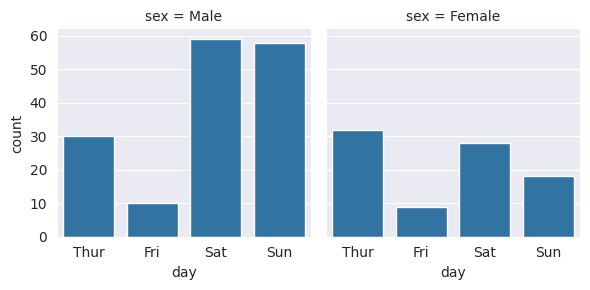

In [91]:
# Multiple Graphs, separated by category
g = sns.FacetGrid(data = tips, col = 'sex')
g.map(sns.countplot, 'day', order=['Thur','Fri','Sat','Sun']) # Can often get incorrect figures without the 'order' argument

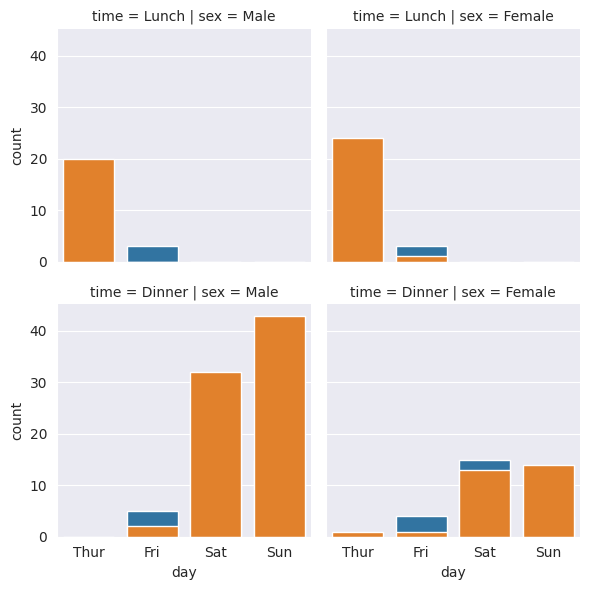

In [94]:
# Multiple Graphs, separated by category
g = sns.FacetGrid(data = tips, col = 'sex', row='time', hue='smoker')
g.map(sns.countplot, 'day', order=['Thur','Fri','Sat','Sun'])

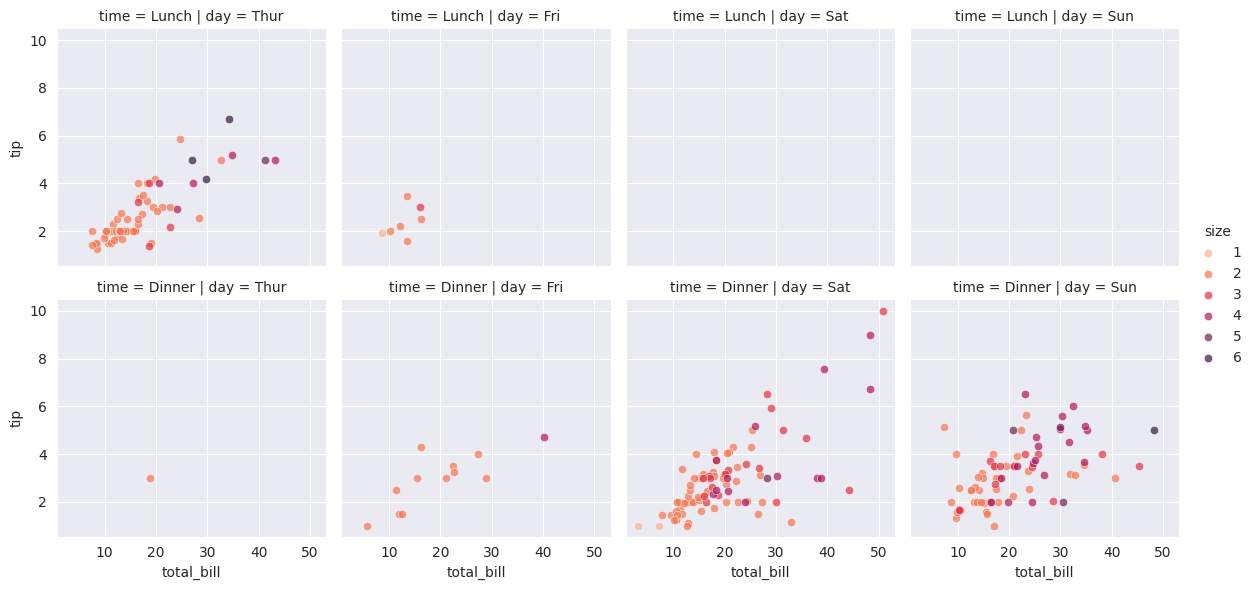

In [95]:
# Facet Grid
pal = {1:'#cccccc', 2:'#aaaaaa', 3:'#888888', 4:'#666666', 5:'#444444', 6:'#222222'} # Grayscale

#g = sns.FacetGrid(tips, col="day", row="time", hue="size", palette=pal)
g = sns.FacetGrid(tips, col="day", row="time", hue="size", palette='rocket_r')

g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

#### Pairplot/PairGrid
The pairplot will take each quantitative variable and graph a scatterplot with each of the other quantitative variables. It will also create a histogram of that variable.

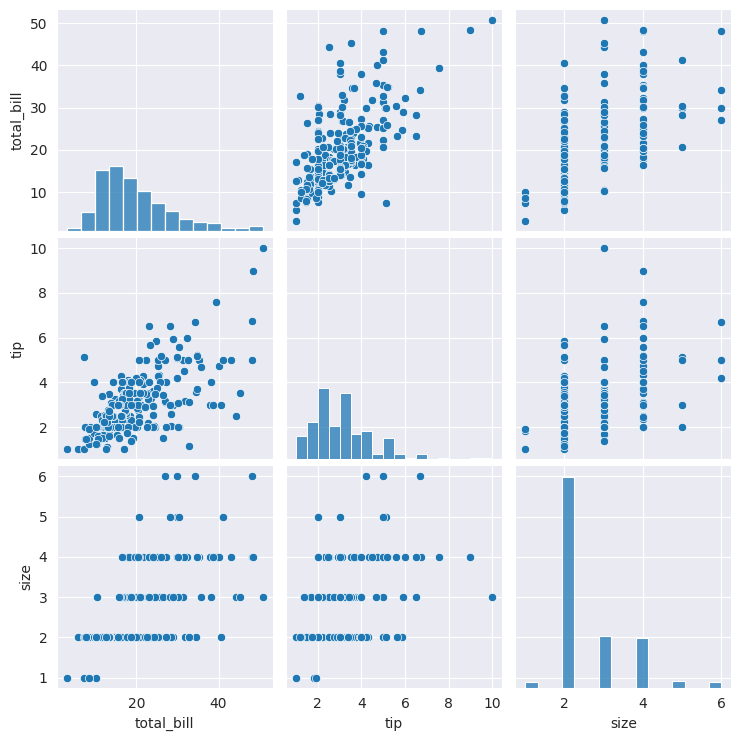

In [96]:
# Pairplot
sns.pairplot(data=tips)

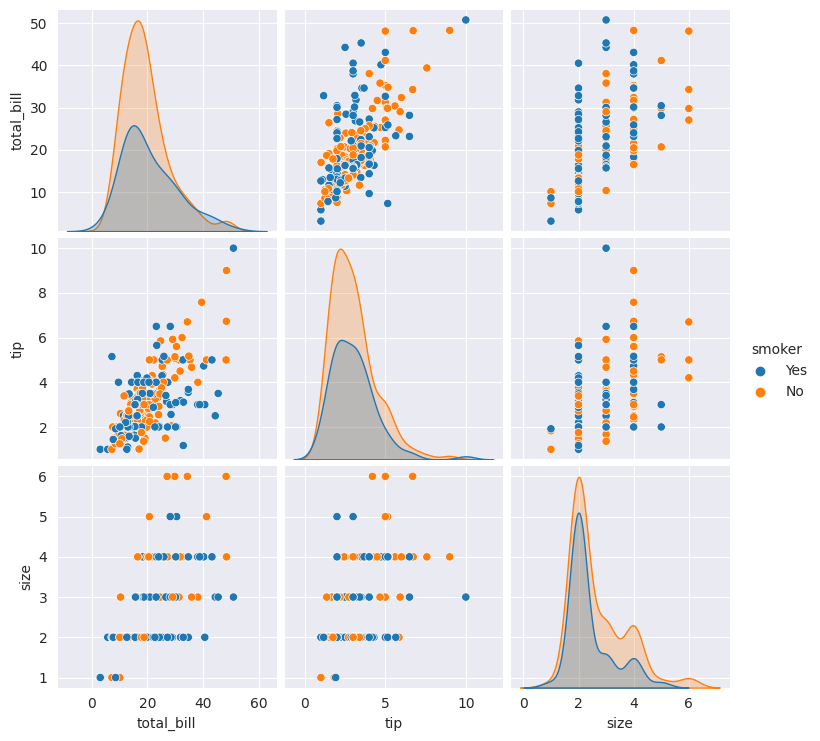

In [97]:
sns.pairplot(data=tips, hue='smoker')

We can customize the pairplot using the PairGrid

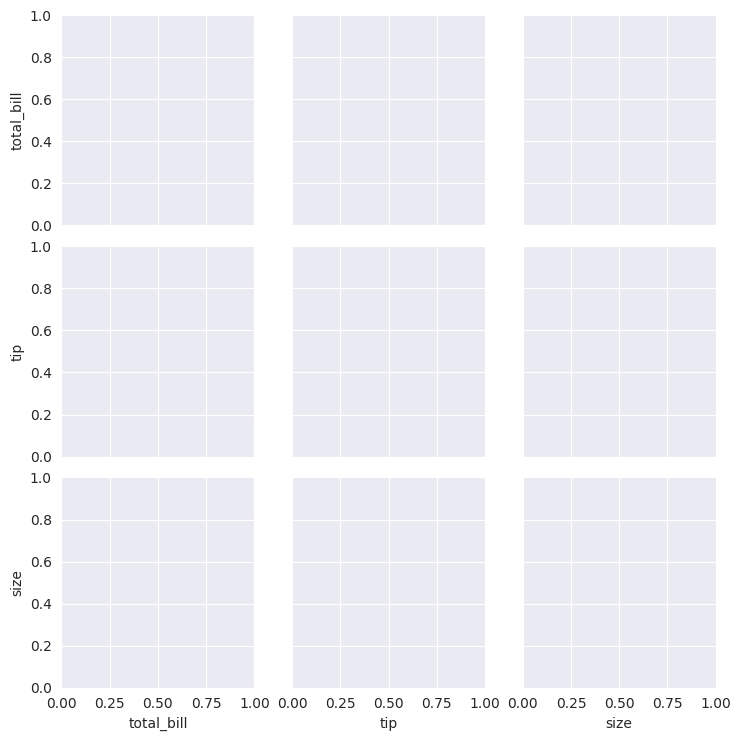

In [98]:
# Pairgrid
sns.PairGrid(tips)

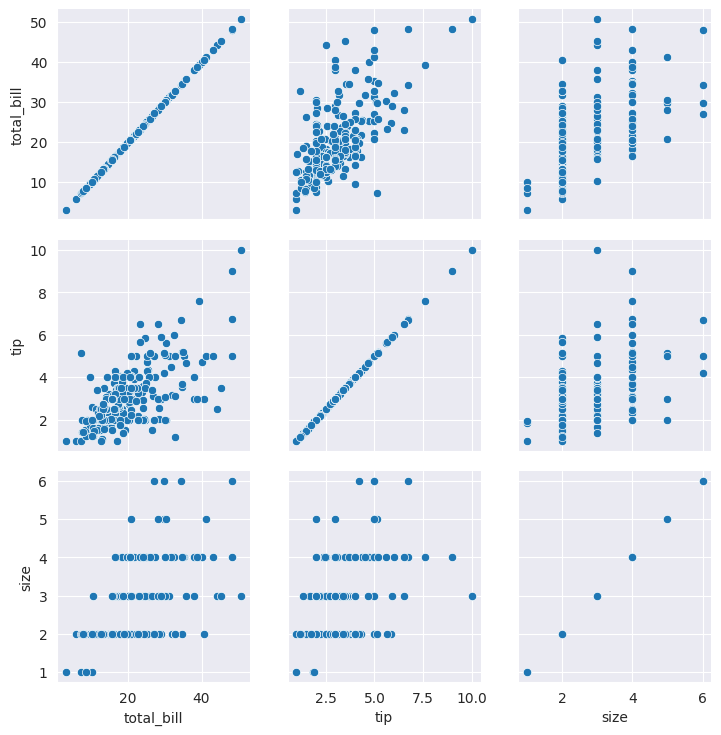

In [99]:
g = sns.PairGrid(tips)
g.map(sns.scatterplot)
#g.map(plt.scatter)

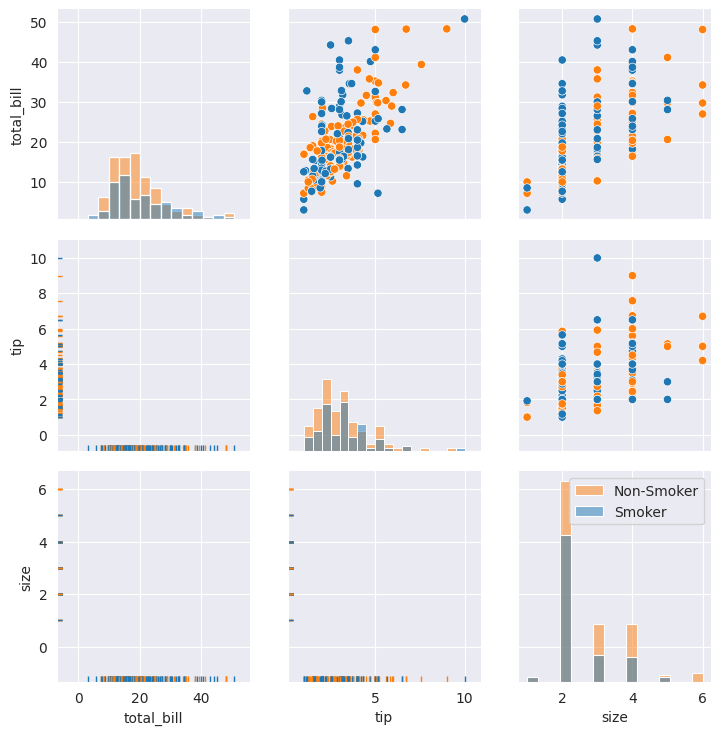

In [102]:
g = sns.PairGrid(tips, hue='smoker')

g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)
plt.legend(['Non-Smoker','Smoker'])

#### Jointplot/JointGrid

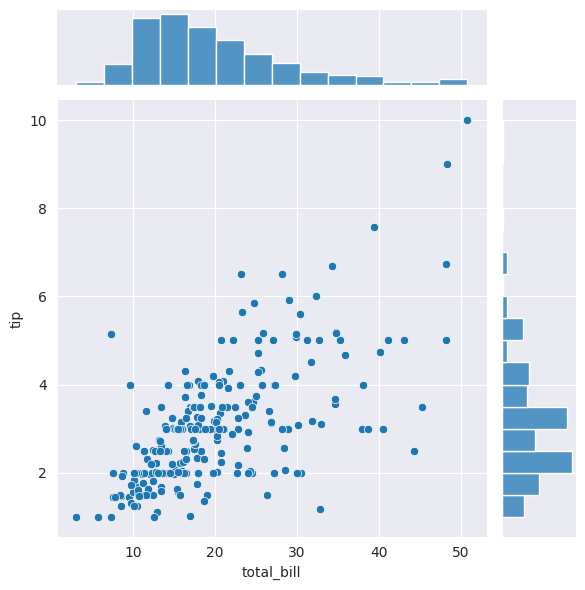

In [103]:
# Jointplot
sns.jointplot(data=tips, x='total_bill', y='tip')

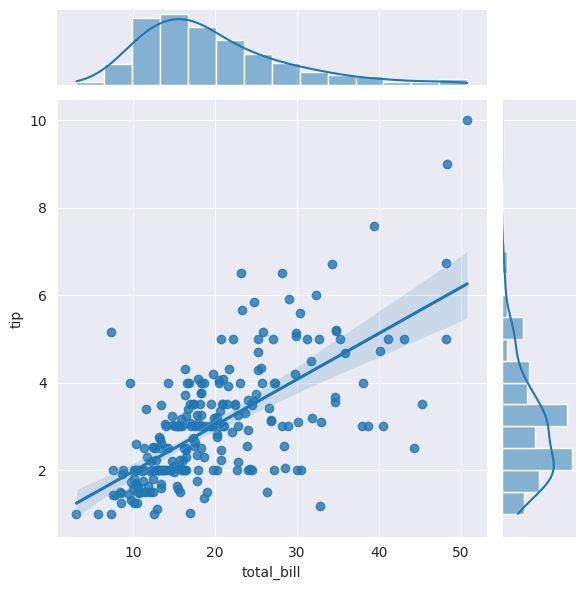

In [104]:
sns.jointplot(data=tips, x='total_bill', y='tip',
                kind='reg')

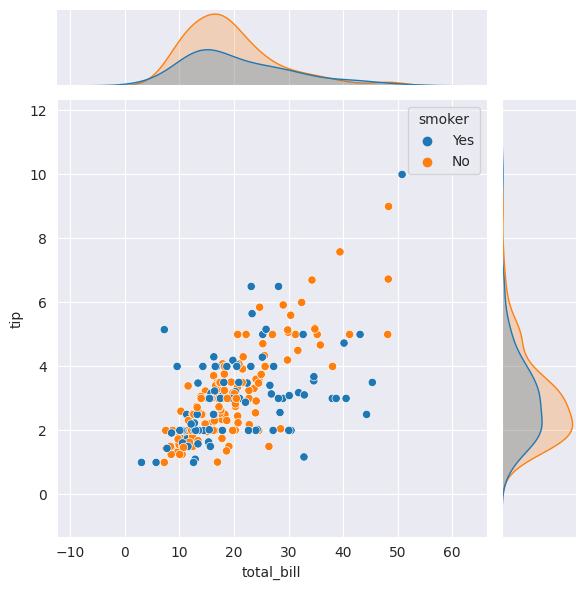

In [105]:
sns.jointplot(data=tips, x='total_bill', y='tip',
                hue='smoker')

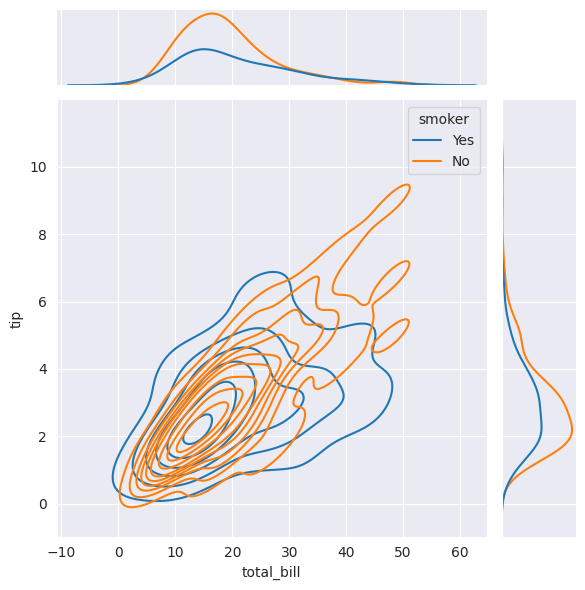

In [106]:
sns.jointplot(data=tips, x='total_bill', y='tip',
                kind='kde', hue='smoker')

We can customize the joingplot using JointGrid

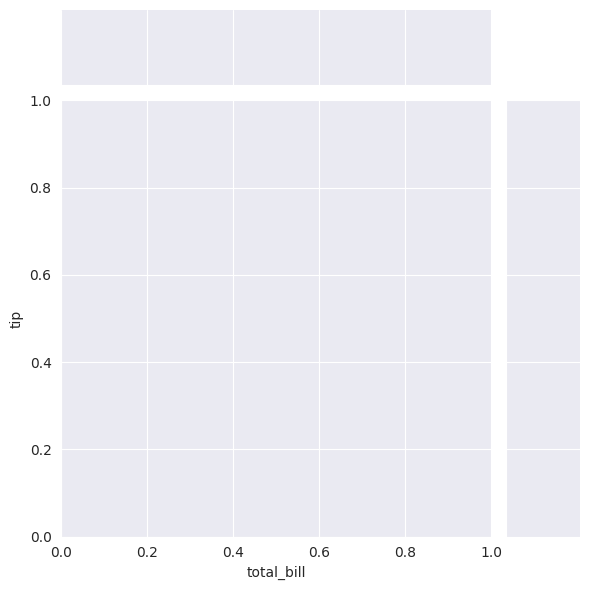

In [107]:
# Jointgrid
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

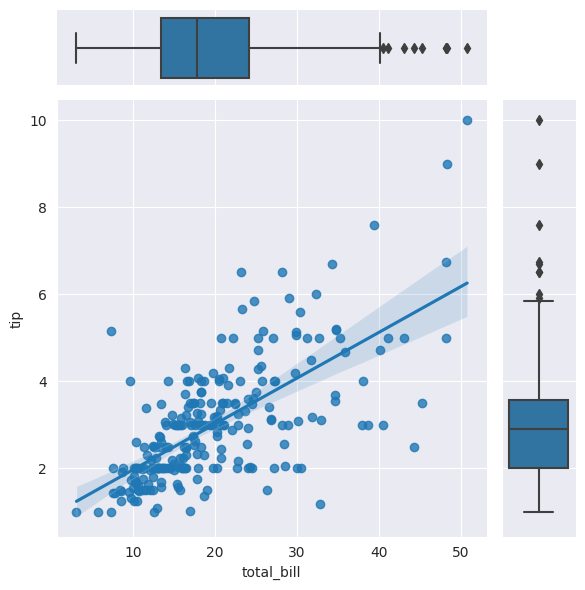

In [108]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.boxplot)